### Classification Assignment - 2 [2019AIML622]

#### Reading data

In [2]:
import pandas as pd

In [3]:
liver_df = pd.read_csv('liver_disease_1.csv')

In [4]:
liver_df.shape

(583, 10)

In [5]:
liver_df.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes


In [6]:
liver_df.describe(include='all')

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,416
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,NaN
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,NaN
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,NaN
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,NaN
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,NaN
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,NaN


In [7]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Total_Bilirubin             583 non-null    float64
 2   Direct_Bilirubin            583 non-null    float64
 3   Alkaline_Phosphotase        583 non-null    int64  
 4   Alamine_Aminotransferase    583 non-null    int64  
 5   Aspartate_Aminotransferase  583 non-null    int64  
 6   Total_Protiens              583 non-null    float64
 7   Albumin                     583 non-null    float64
 8   Albumin_and_Globulin_Ratio  579 non-null    float64
 9   Dataset                     583 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB


In [8]:
#observation:
# 1. we have 4 null value for feature 'Albumin_and_Globulin_Ratio'
# 2. There are 9 features and 1 output - Dataset. Value Yes indicates that the patient has liver disease and No indicates the patient does not have liver disease.
# 3. We can see that there are missing values for Albumin_and_Globulin_Ratio as only 579 entries have valid values indicating 4 missing values.

In [9]:
#Which features are available in the dataset?
liver_df.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [10]:
#Check for any null values
liver_df.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [11]:
## The only data that is null is the Albumin_and_Globulin_Ratio - Only 4 rows are null.
# Lets see whether this is an important feature

### Doing Exploratory Data Analysis

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


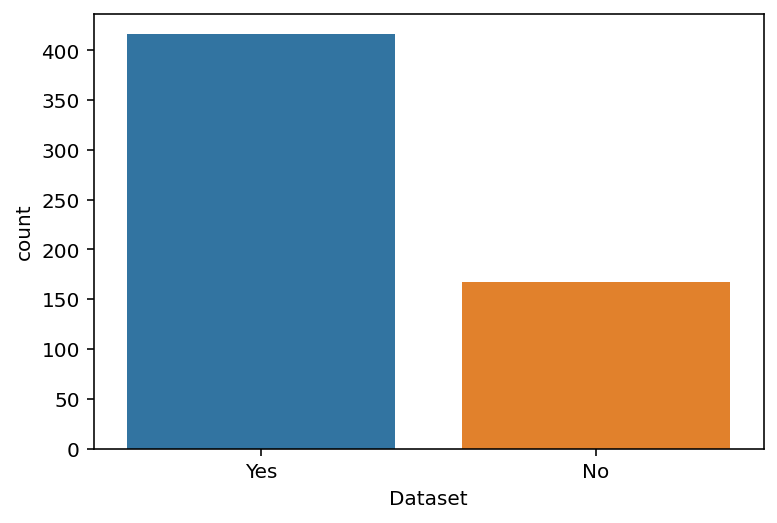

In [13]:
## Grouping data based on dataset ( Yes = people have LIver disease, No = people do not have liver disease)

sns.countplot(data=liver_df, x = 'Dataset', label='Count')

LD, NLD = liver_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


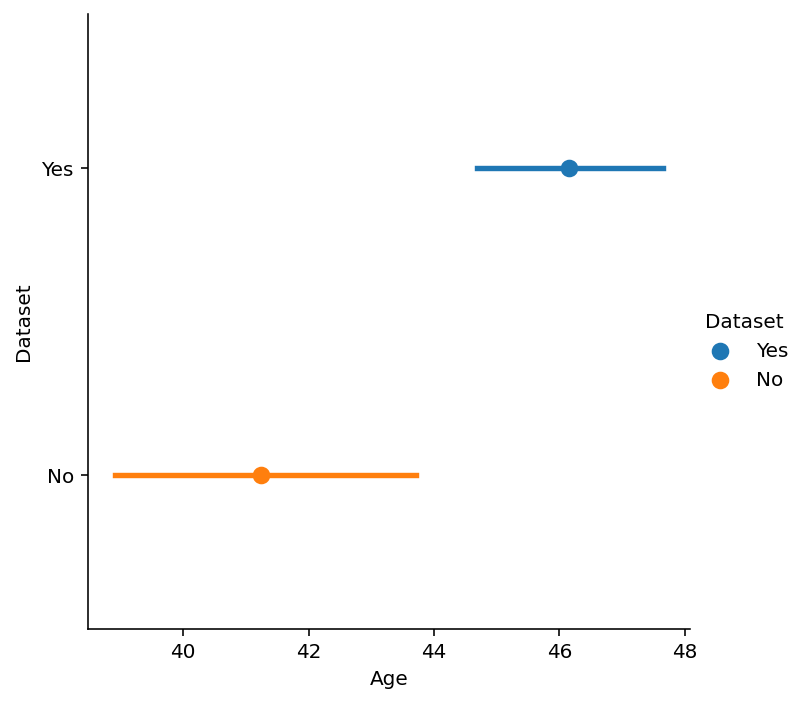

In [14]:
sns.factorplot(x="Age", y="Dataset", hue="Dataset", data=liver_df);

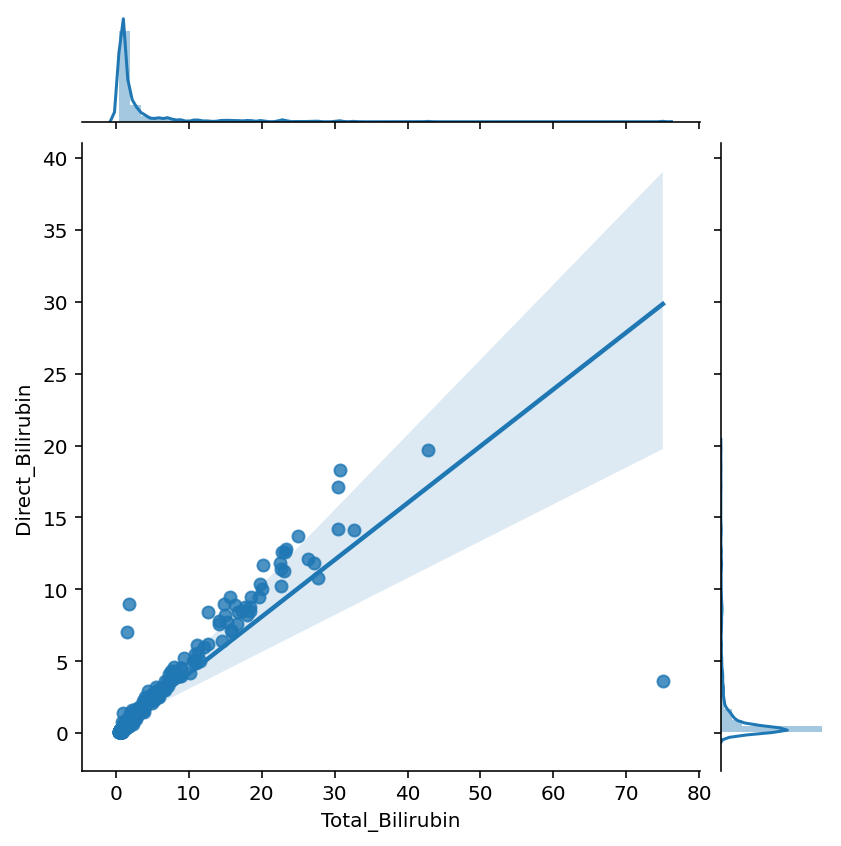

In [15]:
## There seems to be direct relationship between Total_Bilirubin and Direct_Bilirubin. We have the possibility of removing one of this feature.
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=liver_df, kind="reg")

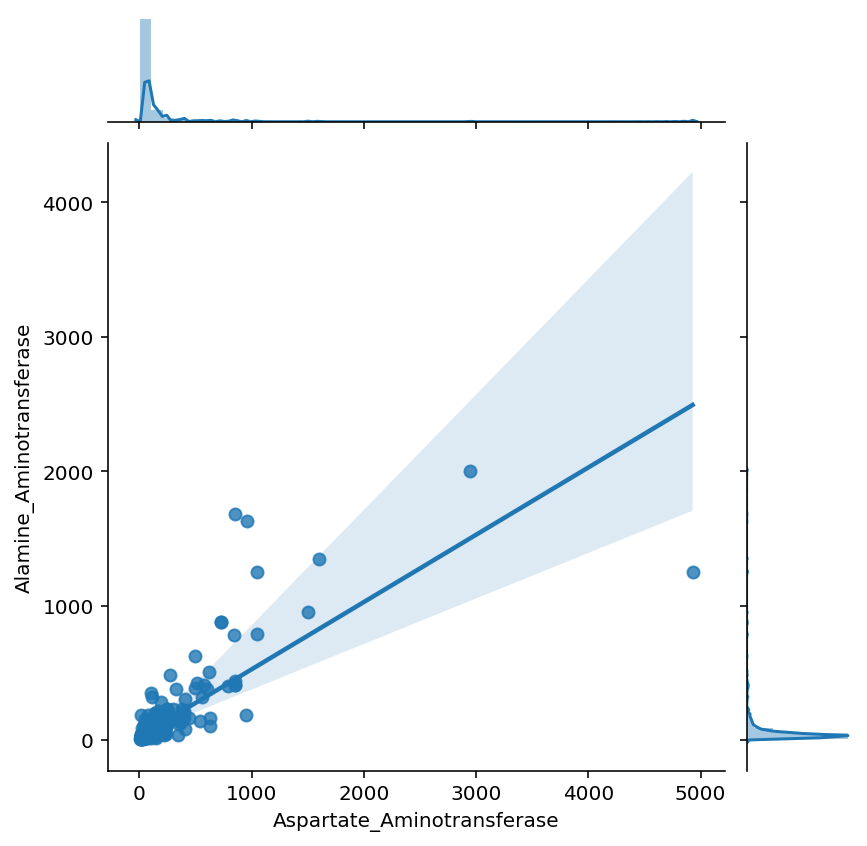

In [16]:
## There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase. We have the possibility of removing one of this feature
sns.jointplot("Aspartate_Aminotransferase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

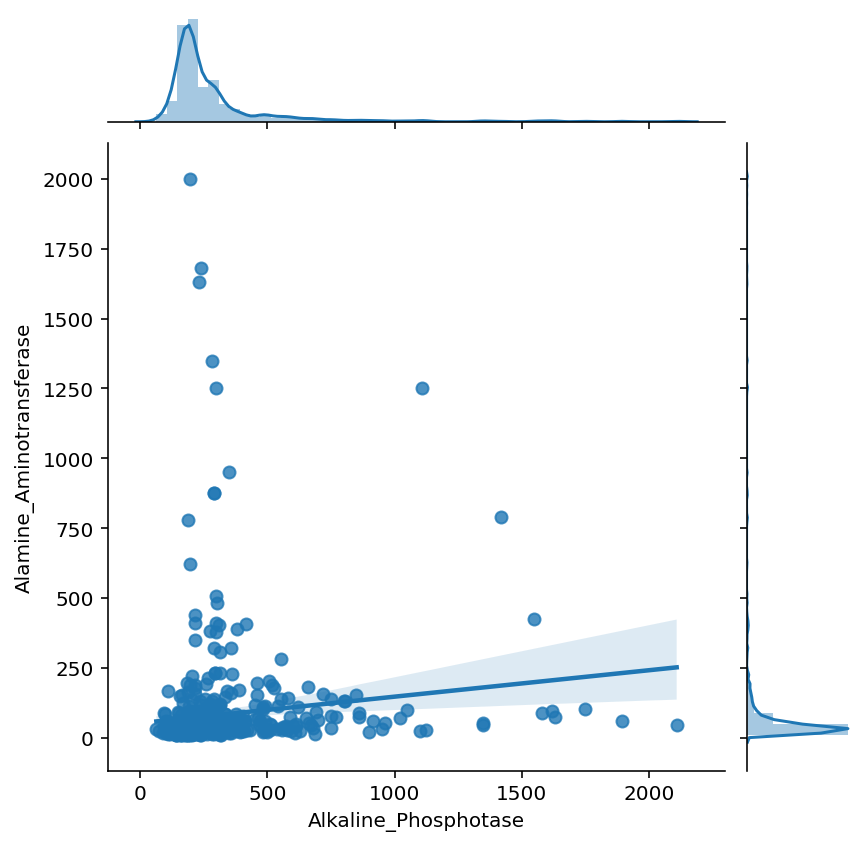

In [17]:
sns.jointplot("Alkaline_Phosphotase", "Alamine_Aminotransferase", data=liver_df, kind="reg")

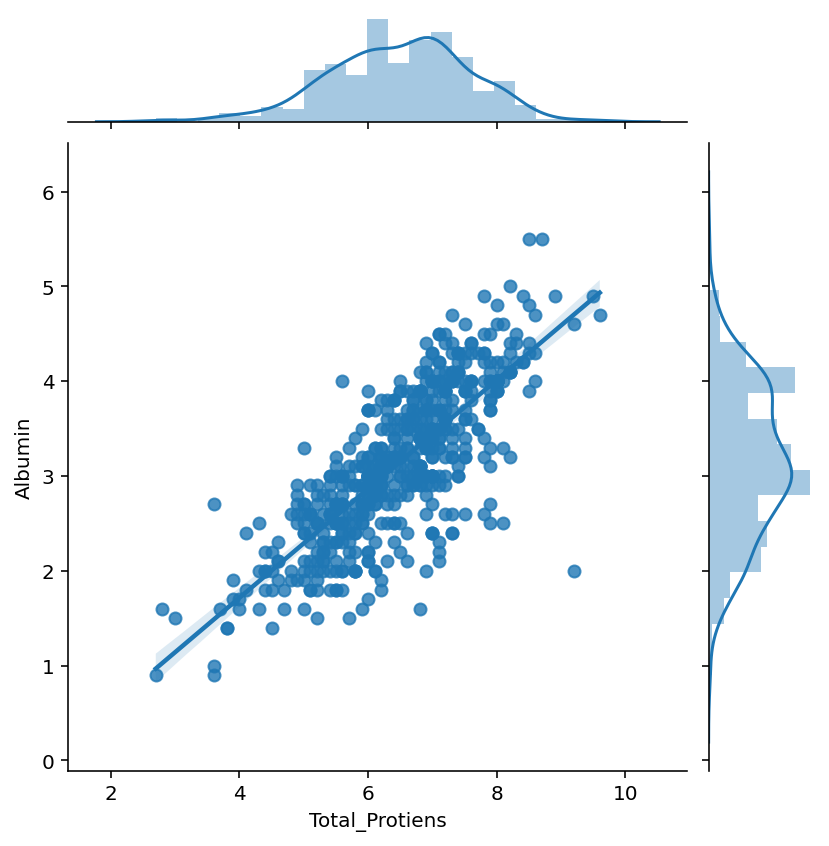

In [18]:
sns.jointplot("Total_Protiens", "Albumin", data=liver_df, kind="reg")

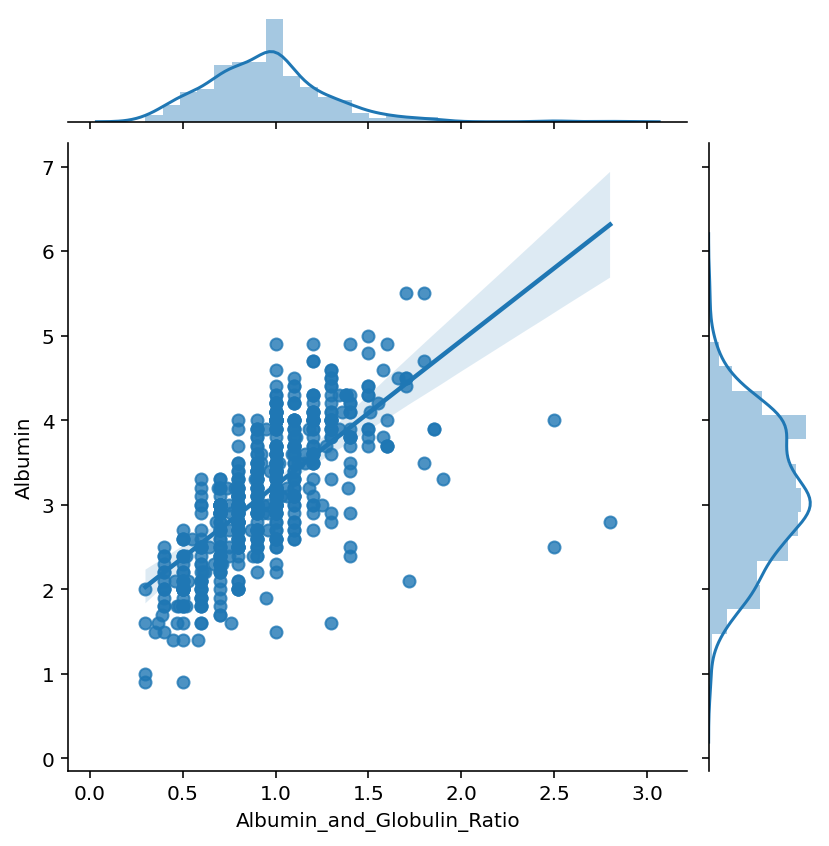

In [19]:
sns.jointplot("Albumin_and_Globulin_Ratio", "Albumin", data=liver_df, kind="reg")


From the above jointplots and scatterplots, we find direct relationship between the following features:
Direct_Bilirubin & Total_Bilirubin
Aspartate_Aminotransferase & Alamine_Aminotransferase
Total_Protiens & Albumin
Albumin_and_Globulin_Ratio & Albumin

Hence, we can very well find that we can omit one of the features. I'm going to keep the follwing features:
Total_Bilirubin
Alamine_Aminotransferase
Total_Protiens
Albumin_and_Globulin_Ratio
Albumin

In [20]:
liver_df.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes


In [21]:
## Convert categorical variable "Dataset" to indicator variables
#  pd.get_dummies(liver_df['Dataset'], prefix = 'Dataset').head()

In [22]:
#liver_df = pd.concat([liver_df,pd.get_dummies(liver_df['Dataset'], prefix = 'Dataset')], axis=1)

#liver_df['Dataset'] = liver_df['Dataset'].map({'yes': 1, 'no': 0})

liver_df.Dataset[liver_df.Dataset == 'Yes'] = 1
liver_df.Dataset[liver_df.Dataset == 'No'] = 0
liver_df["Dataset"] = liver_df["Dataset"].astype(str).astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [23]:
liver_df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [24]:
liver_df.describe(include='all')

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [25]:
## checking rows with 'Albumin_and_Globulin_Ratio' as null
liver_df[liver_df['Albumin_and_Globulin_Ratio'].isnull()]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [26]:
## replacing NUll Values for the feature 'Albumin_and_Globulin_Ratio' with the mean of this feature dataset

liver_df["Albumin_and_Globulin_Ratio"] = liver_df.Albumin_and_Globulin_Ratio.fillna(liver_df['Albumin_and_Globulin_Ratio'].mean())

#### Splitting Features and labels

In [27]:
# The input variables/features are all the inputs except Dataset.
# The prediction or label is 'Dataset' that determines whether the patient has liver disease or not.

X = liver_df.drop(['Dataset'], axis=1)
X.head(3)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89


In [28]:
y = liver_df['Dataset'] # 1 for liver disease; 0 for no liver disease
y.head(3)

0    1
1    1
2    1
Name: Dataset, dtype: int64

In [29]:
# Correlation
liver_corr = X.corr()
liver_corr

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322
Albumin_and_Globulin_Ratio,-0.216089,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000


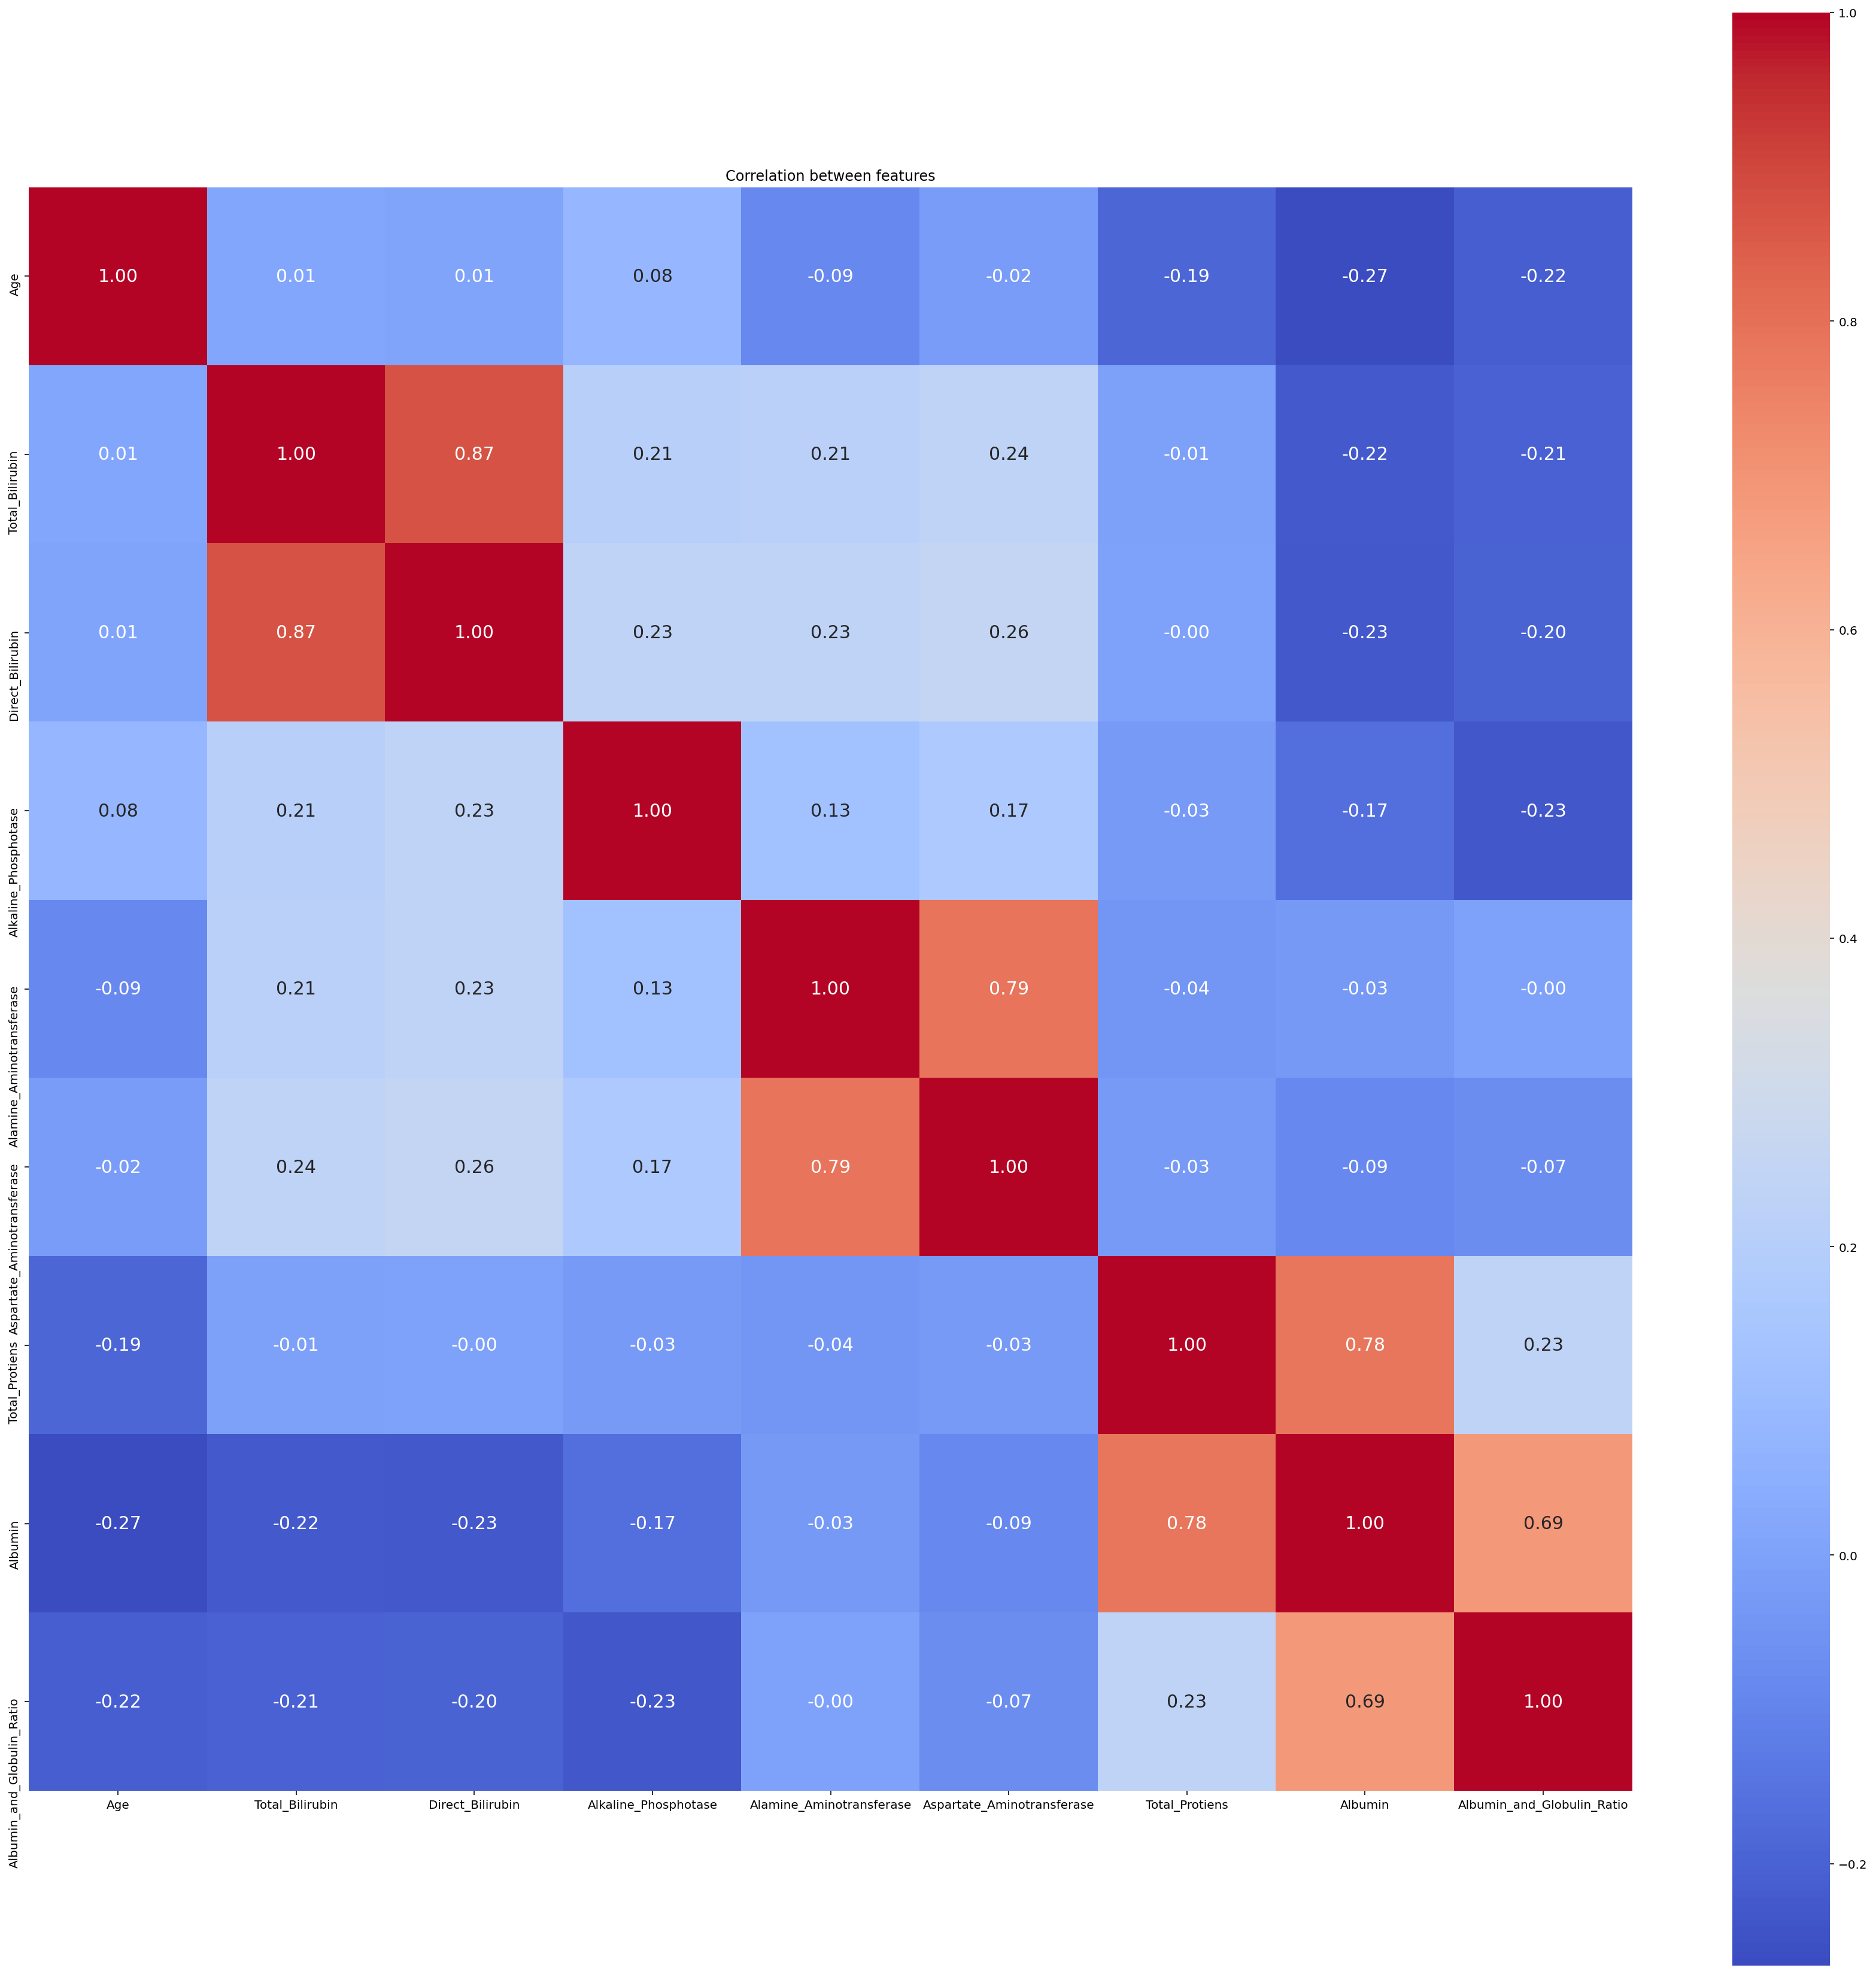

In [30]:
plt.figure(figsize=(30, 30))
sns.heatmap(liver_corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

In [31]:
#The above correlation also indicates the following correlation
# Total_Protiens & Albumin
# Alamine_Aminotransferase & Aspartate_Aminotransferase
# Direct_Bilirubin & Total_Bilirubin
# There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

In [32]:
## Now implement Naive Bayes 

labels = ['low', 'medium', 'high']

for j in liver_df.columns:
    mean = liver_df[j].mean()
    print("mean(", j,") ", mean)

mean( Age )  44.74614065180103
mean( Total_Bilirubin )  3.298799313893652
mean( Direct_Bilirubin )  1.4861063464837074
mean( Alkaline_Phosphotase )  290.57632933104634
mean( Alamine_Aminotransferase )  80.71355060034305
mean( Aspartate_Aminotransferase )  109.91080617495712
mean( Total_Protiens )  6.483190394511151
mean( Albumin )  3.14185248713551
mean( Albumin_and_Globulin_Ratio )  0.9470639032815201
mean( Dataset )  0.7135506003430532


In [33]:
def count(data, colname, label, target):
    condition = (data[colname] == label) & (data['Dataset']==target)
    return len(data[condition])

In [34]:
# Importing modules
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

#### Splitting Train and Test data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)


(408, 9)
(408,)
(175, 9)
(175,)


## implement classification using Logistic Regression

Logistic Regression Training Score: 
 72.06
Logistic Regression Test Score: 
 70.29
Coefficient: 
 [[ 0.00847996  0.16017582  0.28408741  0.00070413  0.00974346  0.00273716
   0.20233463 -0.39752823 -0.51276728]]
Intercept: 
 [-0.27481831]
Accuracy: 
 0.7028571428571428
Confusion Matrix: 
 [[ 12  39]
 [ 13 111]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.24      0.32        51
           1       0.74      0.90      0.81       124

    accuracy                           0.70       175
   macro avg       0.61      0.57      0.56       175
weighted avg       0.66      0.70      0.67       175



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


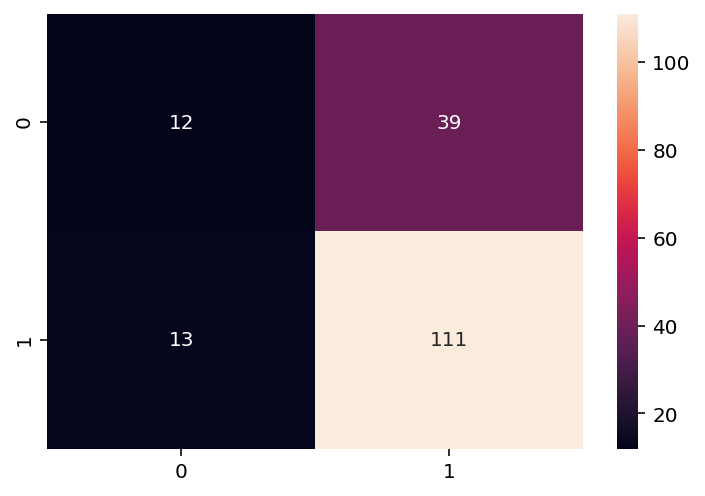

In [36]:
#2) Logistic Regression

# Create logistic regression object
logreg = LogisticRegression()

# Train the model using the training sets and check score
logreg.fit(X_train, y_train)

#Predict Output
log_predicted= logreg.predict(X_test)

logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)

#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [37]:
coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,Direct_Bilirubin,0.284087
6,Total_Protiens,0.202335
1,Total_Bilirubin,0.160176
4,Alamine_Aminotransferase,0.009743
0,Age,0.008480
5,Aspartate_Aminotransferase,0.002737
3,Alkaline_Phosphotase,0.000704
7,Albumin,-0.397528
8,Albumin_and_Globulin_Ratio,-0.512767


Gaussian Score: 
 55.88
Gaussian Test Score: 
 53.14
Accuracy: 
 0.5314285714285715
[[49  2]
 [80 44]]
              precision    recall  f1-score   support

           0       0.38      0.96      0.54        51
           1       0.96      0.35      0.52       124

    accuracy                           0.53       175
   macro avg       0.67      0.66      0.53       175
weighted avg       0.79      0.53      0.53       175



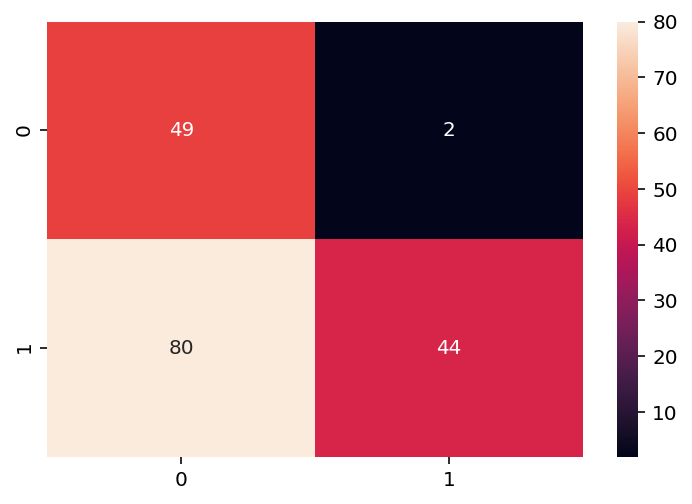

In [38]:
# Gaussian Naive Bayes Classifier

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

#Predict Output
gauss_predicted = gaussian.predict(X_test)

gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

In [39]:
### Model evaluation
#@  We can now rank our evaluation of all the models to choose the best one for our problem.

print('Comparison Matrix')

models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes'],
    'Score': [ logreg_score, gauss_score],
    'Test Score': [ logreg_score_test, gauss_score_test]})
models.sort_values(by='Test Score', ascending=False)

Comparison Matrix


,Model,Score,Test Score
0,Logistic Regression,72.06,70.29
1,Gaussian Naive Bayes,55.88,53.14


#### Trying manual implementation for Naive Bayes Classifier

In [0]:
train_percent = 70
train_len = int((train_percent * len(liver_df))/100)

train_X = liver_df.iloc[:train_len, :]
test_X = liver_df.iloc[train_len+1:, :-1]
test_y = liver_df.iloc[train_len+1:, :-1]

count_0 = count(train_X, 'Dataset', 0, 0)
count_1 = count(train_X, 'Dataset', 1, 1)

prob_0 = count_0/len(train_X)
prob_1 = count_1/len(train_X)

probabilities = np.zeros((3, 3, 3))
#probablities = [0:[], 1:[]]
for col in train_X.columns[:-1]:
    probablities[0][col] = {}
    probablities[1][col] = {}
    for category in labels:
        count_ct_0 = count(train_X, col, category, 0)
        count_ct_1 = count(train_X, col, category, 1)
        probablities[0][col][category] = count_ct_0 / count_0
        probablities[1][col][category] = count_ct_1 / count_1